# ADS Project 3 Group 4

## Libraries and Settings

In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PIL
from PIL import Image

In [2]:
"""
Path
"""
DATA_PATH = "../data/train_set"
IMAGE_FOLDER = os.path.join(DATA_PATH, "images")
POINTS_FOLDER = os.path.join(DATA_PATH, "points")
LABELS_FOLDER = DATA_PATH

## Read Training Data

In [3]:
def read_all_images():
    """
    Read 2500 training images from the IMAGE_FOLDER
    :return a 4d numpy array in form of (index, height, width, channels), channels is RGB 
    """
    files = [file for file in os.listdir(IMAGE_FOLDER) if file.endswith('.jpg')]
    files.sort()
    
    face_images = np.zeros((len(files), 750, 1000, 3))
    
    for index, filename in enumerate(files):
        face_img_arr = plt.imread(os.path.join(IMAGE_FOLDER, filename))
        if face_img_arr.shape != (750,1000,3):
            # resize the image
            face_img = Image.fromarray(face_img_arr)
            face_img = face_img.resize((1000,750))
            face_img_arr = np.array(face_img)
        face_images[index] = face_img_arr
    return face_images

def read_labels():
    """
    Read the image labels from the label.csv file
    :return a pandas.DataFrame with 3 columns: 'emotion_idx','emotion_cat','type'
    """
    labels_df = pd.read_csv(os.path.join(LABELS_FOLDER, 'label.csv'))
    labels_df = labels_df.loc[:,['emotion_idx','emotion_cat','type']]
    return labels_df
    

def read_all_points():
    """
    Read all face coordinates points
    :return a tuple of shape (2500, 78, 2). Because for each of 2500 images there are 78 points associated with it
    """
    files = [file for file in os.listdir(POINTS_FOLDER) if file.endswith('.mat')]
    files.sort()
    
    face_points = np.zeros((len(files), 78, 2))
    for index, filename in enumerate(files):
        face_points_dict = loadmat(os.path.join(POINTS_FOLDER, filename))
    
        face_points[index] = face_points_dict.get('faceCoordinatesUnwarped',  face_points_dict.get('faceCoordinates2'))
    return face_points

def load_data(loadImage = False):
    """
    Load training data from local files
    
    :loadImage if it's False, this function will not load original images
    :return a tuple (images, points, labels)
        if loadImage is False, the 'images' will None. Otherwise its a numpy array with shape (2500,750,1000,3)
        points is a numpy array with shape (2500, 78, 2)
        labels is a pandas.DataFrame
    """
    face_images_narr =  read_all_images() if loadImage else None
    face_images_points = read_all_points()
    labels = read_labels()
    return face_images_narr, face_images_points, labels

In [4]:
# pass True if you want to read original images, it might take some time to do it
images, points, labels = load_data(False)

In [5]:
if images:
    print(images.shape)

print(points.shape)
labels

(2500, 78, 2)


,emotion_idx,emotion_cat,type
0,1,Neutral,simple
1,1,Neutral,simple
2,1,Neutral,simple
3,1,Neutral,simple
4,1,Neutral,simple
5,1,Neutral,simple
6,1,Neutral,simple
7,1,Neutral,simple
8,1,Neutral,simple
9,1,Neutral,simple


## Baseline Model  

### Required packages 

In [9]:
from scipy.spatial.distance import pdist
from sklearn import ensemble
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, make_scorer
from statistics import mean
import time

### Using pairwise distances as features 

In [10]:
distances = np.zeros((2500, 3003))
for i in range(2500):
    current = points[i]
    distances[i,] = pdist(current)

### Fit baseline model with different learning rates using cross-validation

###### Time: 169.443923s ######
###### Time: 176.199083s ######
###### Time: 198.658769s ######
###### Time: 182.504458s ######


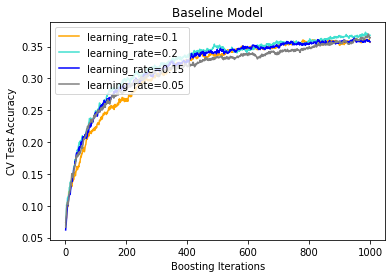

In [15]:
X = distances
Y = labels['emotion_idx']
plt.figure()
original_params = {'n_estimators': 1000, 'max_features': 1, 'max_depth': 1,
                   'learning_rate': 0.1}
for label, color, setting in [('learning_rate=0.1','orange',
                               {'learning_rate':0.1}),
                              ('learning_rate=0.2','turquoise',
                               {'learning_rate':0.2}),
                              ('learning_rate=0.15','blue',
                               {'learning_rate':0.15}),
                              ('learning_rate=0.05','gray',
                               {'learning_rate':0.1})]: 
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    params = dict(original_params)
    base_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            base_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    score = [mean(base_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Baseline Model')
plt.show()

The baseline model has an approximately accuracy of 35%. Next we try to improve its performance by tuning some tree parameters.

### Tuning maximum depth of boosting trees

###### Time: 319.373262s ######
###### Time: 354.091344s ######
###### Time: 232.520437s ######
###### Time: 327.722888s ######
###### Time: 243.396918s ######


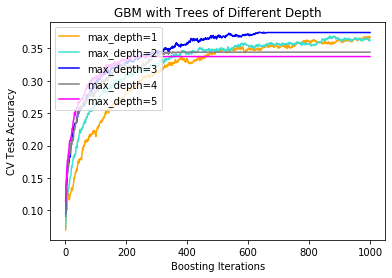

In [16]:
plt.figure()

for label, color, setting in [('max_depth=1', 'orange',
                               {'max_depth': 1}),
                              ('max_depth=2', 'turquoise',
                               {'max_depth': 2}),
                              ('max_depth=3', 'blue',
                               {'max_depth': 3}),
                              ('max_depth=4', 'gray',
                               {'max_depth': 4}),
                              ('max_depth=5', 'magenta',
                               {'max_depth': 5})]:
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    params = dict(original_params)
    depth_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            depth_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    depth_score = [mean(depth_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), depth_score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('GBM with Trees of Different Depth')
plt.show()

We achieve the best performance when $max\_depth = 3$. We are using a greedy strategy here when tuning parameters, so we will update $max\_depth$ to be 3 in the following processes.

### Tuning maximum features considered when split

###### Time: 120.751587s ######
###### Time: 583.197449s ######
###### Time: 192.357206s ######


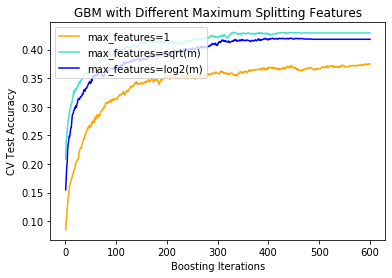

In [17]:
plt.figure()
original_params.update({'max_depth':3, 'n_estimators':600})
for label, color, setting in [('max_features=1', 'orange',
                               {'max_features': 1}),
                              ('max_features=sqrt(m)', 'turquoise',
                               {'max_features': 'sqrt'}),
                              ('max_features=log2(m)', 'blue',
                               {'max_features': 'log2'})]:
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    feature_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params = dict(original_params)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            feature_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    feature_score = [mean(feature_score[:,i]) for i in range(600)]
    plt.plot(range(1, 601), feature_score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('GBM with Different Maximum Splitting Features')
plt.show()

We achieve the highest accuracy when using $\sqrt{m}$ features, where $m = 3003$ is the total number of features.

### Trying to use SGD

###### Time: 731.308937s ######
###### Time: 760.245295s ######
###### Time: 600.908897s ######
###### Time: 981.530684s ######
###### Time: 777.939921s ######


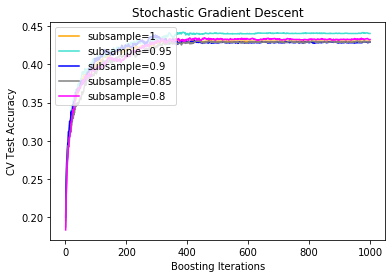

In [19]:
plt.figure()
original_params.update({'max_features':'sqrt', 'n_estimators':1000})
for label, color, setting in [('subsample=1', 'orange',
                               {'subsample': 1}),
                              ('subsample=0.95', 'turquoise',
                               {'subsample': 0.95}),
                              ('subsample=0.9', 'blue',
                               {'subsample': 0.9}),
                              ('subsample=0.85', 'gray',
                               {'subsample': 0.85}),
                              ('subsample=0.8', 'magenta',
                               {'subsample': 0.8})]:
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    sgd_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params = dict(original_params)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            sgd_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    score = [mean(sgd_score[:,i]) for i in range(1000)]
    plt.plot(range(1, 1001), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Stochastic Gradient Descent')
plt.show()

Generally using SGD in GBM will help prevent overfitting problems. The time improvement here is not significant, which is probably because early termination conditions are met in some cases.

### Tuning minimum samples needed to split

###### Time: 738.419781s ######
###### Time: 769.084184s ######
###### Time: 849.656409s ######
###### Time: 804.266430s ######
###### Time: 780.904353s ######


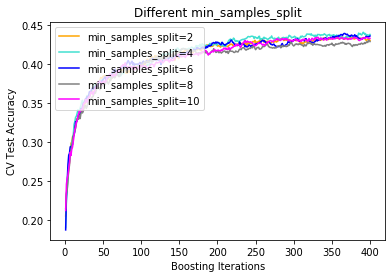

In [20]:
plt.figure()
original_params.update({'subsample':0.95})
for label, color, setting in [('min_samples_split=2', 'orange',
                               {'min_samples_split': 2}),
                              ('min_samples_split=4', 'turquoise',
                               {'min_samples_split': 4}),
                              ('min_samples_split=6', 'blue',
                               {'min_samples_split': 6}),
                              ('min_samples_split=8', 'gray',
                               {'min_samples_split': 8}),
                              ('min_samples_split=10', 'magenta',
                               {'min_samples_split': 10})]: 
    start_time = time.time()
    skf = StratifiedKFold(n_splits = 5, random_state = 666)
    split_score = np.zeros((5,params['n_estimators']), dtype=np.float64)                              
    params = dict(original_params)
    params.update(setting)
    clf = ensemble.GradientBoostingClassifier(**params)
    
    for j, (train_index, test_index) in zip(range(5), skf.split(X, Y)):
        X_train, Y_train = X[train_index], Y[train_index]
        X_test, Y_test = X[test_index], Y[test_index]
        clf.fit(X_train, Y_train)

        for i, Y_pred in enumerate(clf.staged_predict(X_test)):
            split_score[j,i] = accuracy_score(Y_test, Y_pred)
        
    score = [mean(split_score[:,i]) for i in range(400)]
    plt.plot(range(1, 401), score, color=color, label=label)
    print("###### Time: %f" % (time.time() - start_time) + "s ######")

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('CV Test Accuracy')
plt.title('Different min_samples_split')
plt.show()

$min\_samples\_split = 4$ is the optimal one.

# Final Model Performance

In [21]:
def modelfit(alg, X_train, Y_train, performCV=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(X_train, Y_train)
        
    #Predict training set:
    train_pred = alg.predict(X_train)
    
    #Perform cross-validation:
    if performCV:
        cv = cross_validate(alg, X_train, Y_train, return_train_score = True,
                            cv=cv_folds, scoring='accuracy')
        cv_test_score = cv['test_score']
        cv_train_score = cv['train_score']
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(Y_train, train_pred))
    
    if performCV:
        print("CV Train Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % \
              (np.mean(cv_train_score),np.std(cv_train_score),
               np.min(cv_train_score),np.max(cv_train_score)))
        print("CV Test Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % \
              (np.mean(cv_test_score),np.std(cv_test_score),
               np.min(cv_test_score),np.max(cv_test_score)))

In [22]:
original_params.update({'min_samples_split':4})
clf = ensemble.GradientBoostingClassifier(**original_params)
start_time = time.time()
modelfit(clf, X, Y)
print("###### Time: %f" % (time.time() - start_time) + "s ######")


Model Report
Accuracy : 1
CV Train Score : Mean - 1 | Std - 0 | Min - 1 | Max - 1
CV Test Score : Mean - 0.4363695 | Std - 0.09841629 | Min - 0.2973523 | Max - 0.5531496
###### Time: 841.813517s ######
